# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import pathlib
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
from keras.utils.np_utils import to_categorical
import pickle
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from keras.models import Sequential

# Uploading Dataset

In [2]:
data_path =r'C:\Users\shaha\Desktop\dataset\training_data'
CATEGORIES = ['smoking','notsmoking'] 

In [3]:
training_data = []
IMG_SIZE=128

def trian_dataset():
    for category in CATEGORIES:
        path = os.path.join(data_path, category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
trian_dataset()

In [4]:
print(len(training_data))

2007


# Shuflle data

In [5]:
import random
random.shuffle(training_data)
train_data, labels_data = zip(*training_data)

In [6]:
for Sample in training_data[:10]:
    print(Sample[1])

1
0
0
1
1
0
1
1
1
1


# Labeling

In [7]:
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)# reshape
y = to_categorical(y, num_classes = 2)

In [8]:
X.shape,y.shape

((2007, 128, 128, 3), (2007, 2))

In [20]:
#pickle.dump(X, open('X.pkl', 'wb'))
#pickle.dump(y, open('y.pkl', 'wb'))

# Visualization

In [9]:
def display_random_set(data, labels, classes):
    plt.figure(figsize=(15, 15))
    for i in range(10):
        plt.subplot(5, 5, (i+1))
        random_val = np.random.randint(low=0, high=len(data))
        img = data[random_val]
        plt.imshow(img)
        plt.axis(False)
        plt.title(classes[np.argmax(labels[random_val])])
    plt.show()

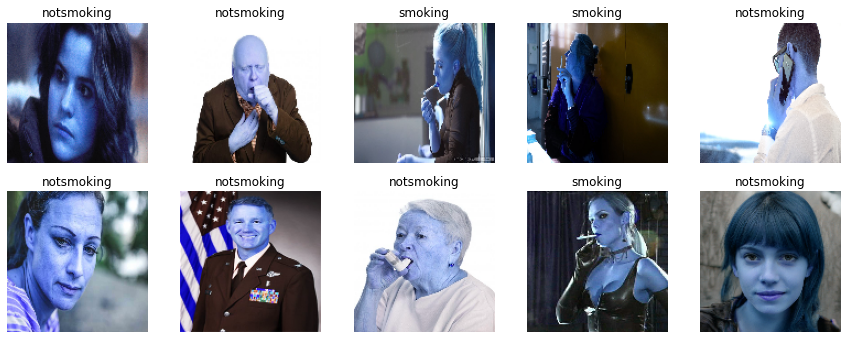

In [10]:
display_random_set(data=X, labels=y, classes=CATEGORIES)

# Split Data (Train - Validation)

In [9]:
#nsample,nx,ny,ni=X.shape #  ANNهذا نستخدمه لو بنطبق  
#X1=X.reshape(nsample,nx*ny*ni)
#print(X1.shape)

(2007, 49152)


In [11]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=.2, random_state=42)

# Starting with modeling

## 1- Convolutional Neural Networks (CNN)

In [13]:
#model = sequential() # الهندي.....

#model.add(Conv2D(64, (3,3), activation = 'relu' ))
#model.add(MaxPooling2D((2,2)))

#model.add(Conv2D(64, (3,3), activation = 'relu' ))
#model.add(MaxPooling2D((2,2)))

#model.add(Flatten())

#model.add(Dense(128, input_shape = X_train.shape[1:],activation = 'relu'))

#model.add(Dense(2, activation = 'softmax'))

In [14]:
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10) 

In [12]:
model = Sequential()

model.add(InputLayer(input_shape=(128, 128, 3)))

model.add(Conv2D(32, 3, activation='relu'))   
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu'))   
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu'))  
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(2 , activation = 'softmax'))   

In [13]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [14]:
M = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)   

Epoch 1/10
26/26 [==============================] - 32s 1s/step - loss: 31.5749 - accuracy: 0.5508 - val_loss: 0.6931 - val_accuracy: 0.6343
Epoch 2/10
26/26 [==============================] - 33s 1s/step - loss: 0.6274 - accuracy: 0.6386 - val_loss: 0.6640 - val_accuracy: 0.6667
Epoch 3/10
26/26 [==============================] - 33s 1s/step - loss: 0.5432 - accuracy: 0.7159 - val_loss: 0.6741 - val_accuracy: 0.6741
Epoch 4/10
26/26 [==============================] - 33s 1s/step - loss: 0.4555 - accuracy: 0.7720 - val_loss: 0.6525 - val_accuracy: 0.6542
Epoch 5/10
26/26 [==============================] - 33s 1s/step - loss: 0.3694 - accuracy: 0.8268 - val_loss: 0.7376 - val_accuracy: 0.6791
Epoch 6/10
26/26 [==============================] - 33s 1s/step - loss: 0.3148 - accuracy: 0.8579 - val_loss: 0.8167 - val_accuracy: 0.6716
Epoch 7/10
26/26 [==============================] - 33s 1s/step - loss: 0.2611 - accuracy: 0.8903 - val_loss: 0.8348 - val_accuracy: 0.6716
Epoch 8/10
26/26 [=

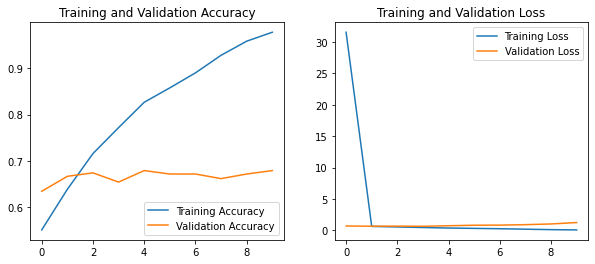

In [17]:
acc = M.history['accuracy']
val_acc = M.history['val_accuracy']

loss = M.history['loss']
val_loss = M.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()